# Modulo N°3 - Proyecto Mayo "Optimización - Revisado"

### Calculo Avanzado - Carlos Ritz - Juan Zúñiga

Realizar un modelo es la representación de una problemática real, en donde se aplican todas las condiciones que deben cumplir para obtener los mejores resultados.
Por lo cual en el desarrollo de la siguiente actividad utilizaremos algunos modelos matemáticos como lo son los modelos de weibull y Korsmeyer–Peppas, siendo este en primera instancia pensado para la optimización de una problemática para adjuntar un código correspondiente. 

Para la realizacion de la Optimización, se consideran dos modelos, primero esta el modelo de Weibull, y segundo el modelo de Higuchi:

Modelo de Weibull  -   $\large u(t) = 1 - e^{-at} $

Modelo de Higuchi - $\large u(t) = at^{\frac{1}{2}} $

Donde tenemos la funcion costo, la cual mide la diferencia de los pronosticado por uno de los modelos a los datos experimentales, la cual es de la siguiente forma:

$\large \sum_{i=1}^{n} (y(p_; x_{i})- \hat{y_i})^{2} $

el cual usaremos para conocer la funcion costo de uno de los modelos, quedando de la siguiente manera:

$\large \sum_{i=1}^{n} (u(t) -\hat{y_i})^{2} $

el cual utilizaremos unos datos para poder ilustrar la informacion:

$ \large t_{i} | 0.1 | 0.2 | 0.3 | 0.4 | 0.5 | 0.6 | 0.7 | 0.8 | 0.9 | 1.0| $

$\large u_{i} | 0.2 | 0.3 | 0.45 | 0.55 | 0.6 | 0.7 | 0.75 | 0.8 | 0.8 | 0.8 |$

### Implementacion:

Para poder graficar usaremos la libreria Matplotlib, además de numpy y para realizar graficos de 3 dimensiones.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

Crearemos las funciones para los dos modelos.

In [2]:
def Weibull(a,t):
    wb = 1-np.exp(-(t)*a)
    return wb

def Higuchi(a,t):
    hg = a*(t**(1/2))
    return hg

Asignaremos los datos que uilizaremos con un rango de 10 datos.

In [48]:
t_i = np.linspace(0.1,1.0,10)
u_i = [0.2,0.3,0.45,0.55,0.6,0.7,0.75,0.8,0.8,0.8]

Realizaremos tanto los datos de la funcion para cada uno de los valores en los dos modelos.

In [49]:
wb = []
hg = []
for x in range(len(t_i)):
    wb.append(Weibull(u_i[x], t_i[x]))
    hg.append(Higuchi(u_i[x], t_i[x]))

Mostraremos los datos por pantalla.

In [50]:
print("Datos de Weibull =",wb)
print()
print("Datos de Higuchi= ",hg)

Datos de Weibull = [0.019801326693244747, 0.05823546641575128, 0.12628408831196558, 0.1974812020375215, 0.2591817793182821, 0.34295318018494325, 0.4084446356331849, 0.47270757595695145, 0.5132477440400284, 0.5506710358827784]

Datos de Higuchi=  [0.0632455532033676, 0.13416407864998736, 0.2464751508773248, 0.3478505426185218, 0.4242640687119285, 0.5422176684690383, 0.6274950199005567, 0.7155417527999327, 0.7589466384404111, 0.8]


Realizamos el grafico para el modelo **Weibull**.

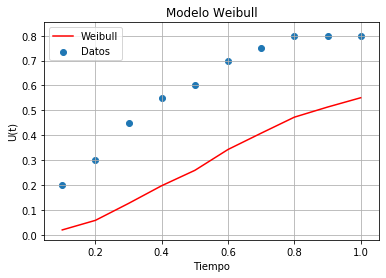

In [51]:
plt.figure(0)
plt.title("Modelo Weibull")
plt.scatter(t_i,u_i, label="Datos")
plt.plot(t_i, wb, color="red", label="Weibull")
#plt.scatter(t_i,wb,color="green")
plt.xlabel("Tiempo")
plt.ylabel("U(t)")
plt.grid()
plt.legend()

Y para el modelo **Higuchi**.

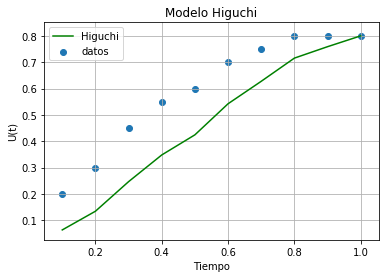

In [52]:
plt.figure(1)
plt.title("Modelo Higuchi")
plt.scatter(t_i,u_i, label="datos")
plt.plot(t_i,hg,color="green", label="Higuchi")
#plt.scatter(t_i,hg,color="red")
plt.xlabel("Tiempo")
plt.ylabel("U(t)")
plt.grid()
plt.legend()

### La funcion costo del modelo Higuchi por la comparacion de los datos.

$\large \sum_{i=1}^{10} ((a \cdot t^{\frac{1}{2}}) -\hat{y_i})^{2}) $

Realizacion de la Sumatoria a mano:

$ ((0.0632455532033676)-0.2)^{2}+((0.13416407864998736)-0.3)^{2}+((0.2464751508773248)-0.45)^{2}+ ((0.3478505426185218)-0.55)^{2} $


$+((0.4242640687119285)-0.6)^{2}+((0.5422176684690383)-0.7)^{2}+ ((0.6274950199005567)-0.75)^{2}+((0.7155417527999327)-0.8)^{2}$

$+((0.7589466384404111)-0.8)^{2}+((0.8)-0.8)^{2} $

**Quedando como Resultado:** 0.20809452471234147

**Resolvemos mediante Python:**

In [77]:
resultados = []
print("Pasos de cada sumatoria")
print("")
for i in range(len(u_i)):
    resultados.append((hg[i] - u_i[i])**2)
    print(hg[i],"-",u_i[i],"**2","= ",(hg[i] - u_i[i])**2)
print("")
print("Resultados de cada sumatoria: ",resultados)
print("")
print("La Función de Costo es: ",np.sum(resultados))
print("")
print("El mínimo es: ",np.amin(resultados))

Pasos de cada sumatoria

0.0632455532033676 - 0.2 **2 =  0.018701778718652962
0.13416407864998736 - 0.3 **2 =  0.027501552810007573
0.2464751508773248 - 0.45 **2 =  0.04142236421040771
0.3478505426185218 - 0.55 **2 =  0.0408644031196261
0.4242640687119285 - 0.6 **2 =  0.030883117545685776
0.5422176684690383 - 0.7 **2 =  0.024895264143346297
0.6274950199005567 - 0.75 **2 =  0.015007470149165005
0.7155417527999327 - 0.8 **2 =  0.007133195520107682
0.7589466384404111 - 0.8 **2 =  0.001685378495342335
0.8 - 0.8 **2 =  0.0

Resultados de cada sumatoria:  [0.018701778718652962, 0.027501552810007573, 0.04142236421040771, 0.0408644031196261, 0.030883117545685776, 0.024895264143346297, 0.015007470149165005, 0.007133195520107682, 0.001685378495342335, 0.0]

La Función de Costo es:  0.2080945247123414

El mínimo es:  0.0


### Función Rosenbrook

Se trabajará con la siguiente función Rosenbrook:

$ F(x,y) = 100\cdot(y-x^{2})^{2} + (1-x)^{2} $

Podemos modificar la variable s para obtener diferentes resultados, ingresando 1, 0.25, 0.1 o 0.05.

In [12]:
s = 0.05
X = np.arange(-2, 2.+s, s)
Y = np.arange(-1, 3.+s, s)
X, Y = np.meshgrid(X, Y)

La funcion con dos parametros utilizando numpy

In [13]:
Z = 100.*(Y-X*X)**2 + (1.-X)**2

Ahora lo siguiente es para dibujar el grafico

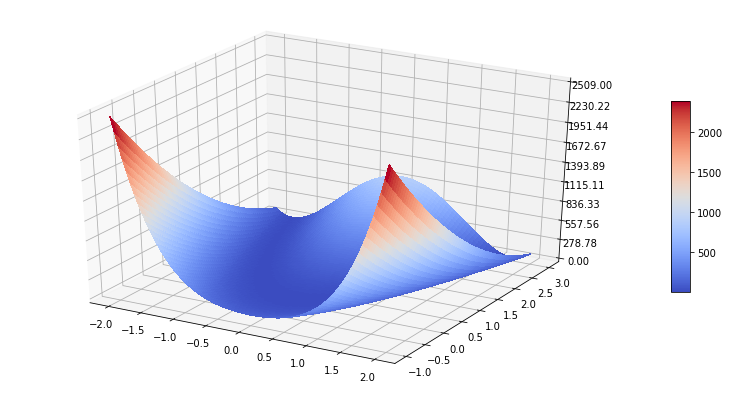

In [17]:
fig = plt.figure(figsize=(14, 7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

Donde Obtenemos el **Gradiente** de la función **Rosenbrook**

$
\Large
\nabla f = \bigl(\begin{smallmatrix}
 & \\ -400x(y-x^{2})-2(1-x)
 & \\ 200(y-x^{2})
\end{smallmatrix}\bigr) $

In [20]:
df = lambda x , y : np.array([-400*x*(y-x**2)-2*(1-x),200*(y-x**2)])
f = lambda x,y : 100* ((y-x**2))**2 + (1-x)**2

Realizamos la **Optimización**

In [22]:
F = lambda X: f(X[0],X[1])
dF = lambda X: df(X[0],X[1])
x0 = np.array([-1.4,1.1])
print(F(x0))
print(dF(x0))

79.71999999999994
[-486.4 -172. ]


Mostramos la figura correspondiente:

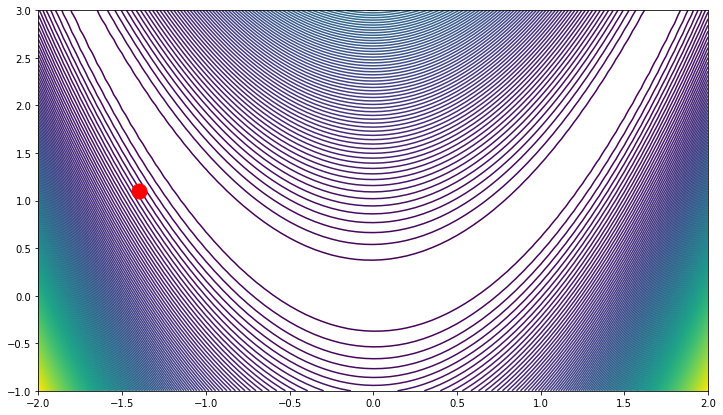

In [24]:
plt.figure(figsize=(12, 7))
plt.contour(X,Y,Z,200)
plt.plot([x0[0]],[x0[1]],marker='o',markersize=15, color ='r')

Para luego encontrar una **dirección de descenso**

[486.4 172. ]


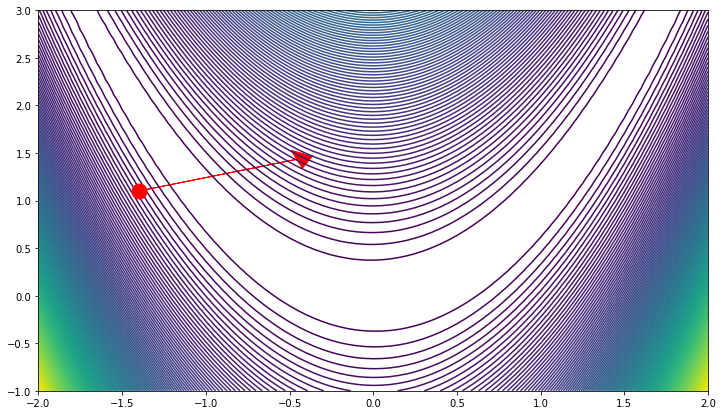

In [26]:
fx = F(x0);
gx = dF(x0);
s = -gx;
print(s)
plt.figure(figsize=(12, 7))
plt.contour(X,Y,Z,200)
ns = np.sqrt(s[0]**2+s[1]**2);
plt.plot([x0[0]],[x0[1]],marker='o',markersize=15, color ='r')
plt.arrow(x0[0],x0[1],s[0]/ns,s[1]/ns, head_width=0.2, head_length=0.1, fc='r', ec='r')